# Zomato Restaurant Data Cleaning and Preprocessing

## Importing Necessary Files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset and Read the Files

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\sujee\OneDrive\Desktop\Jupyter_Project\Zomato\zomato.csv")

# Display the first 5 rows
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Cleaning up the Data

### Removing Unnecesssary Columns

In [48]:
columns_to_drop = ['url', 'phone', 'address', 'menu_item', 'reviews_list']
df.drop(columns=columns_to_drop, inplace=True)

In [5]:
# Converting the columns first Characters to UpperCase
df.columns = df.columns.str.title()

# Check for missing values in the dataset
df.isnull().sum()

Url                                0
Address                            0
Name                               0
Online_Order                       0
Book_Table                         0
Rate                            7775
Votes                              0
Phone                           1208
Location                          21
Rest_Type                        227
Dish_Liked                     28078
Cuisines                          45
Approx_Cost(For Two People)      346
Reviews_List                       0
Menu_Item                          0
Listed_In(Type)                    0
Listed_In(City)                    0
dtype: int64

### Drop Dupliactes and Converting Datatypes

In [11]:
df = df.drop_duplicates()
df = df.sort_values(by='Votes', ascending=False).drop_duplicates(subset=['Name'], keep='first')

# Drop missing Values and dupliacte values
df['Rate'] = df['Rate'].astype(str).str.extract(r'(\d+\.\d+)')  # Extract numeric part
df['Rate'] = pd.to_numeric(df['Rate'])  # Convert to float

df['Approx_Cost(For Two People)'] = df['Approx_Cost(For Two People)'].str.replace(',', '').astype(float)

cols_to_check = ['Dish_Liked', 'Rest_Type', 'Location', 'Cuisines', 'Approx_Cost(For Two People)']
df = df.dropna(subset=cols_to_check)

# Fill missing values in 'Rate' with its median
df['Rate'] = df['Rate'].fillna(df['Rate'].median())

## Data Exploration!

### What are the top 10 most reviewed restaurants?

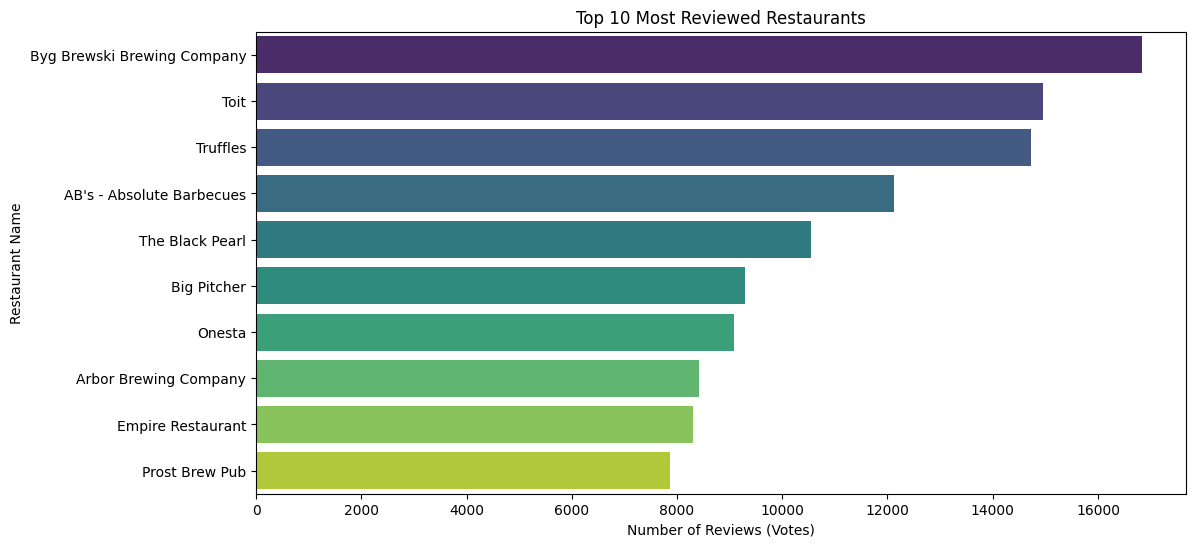

In [33]:
top_reviewed = df.nlargest(10, 'Votes')[['Name', 'Votes']]
plt.figure(figsize=(12, 6))
sns.barplot(x="Votes", y="Name", data=top_reviewed, hue="Name", palette="viridis", legend=False)
plt.xlabel("Number of Reviews (Votes)")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Most Reviewed Restaurants")
plt.show()

### What is the distribution of restaurant ratings?

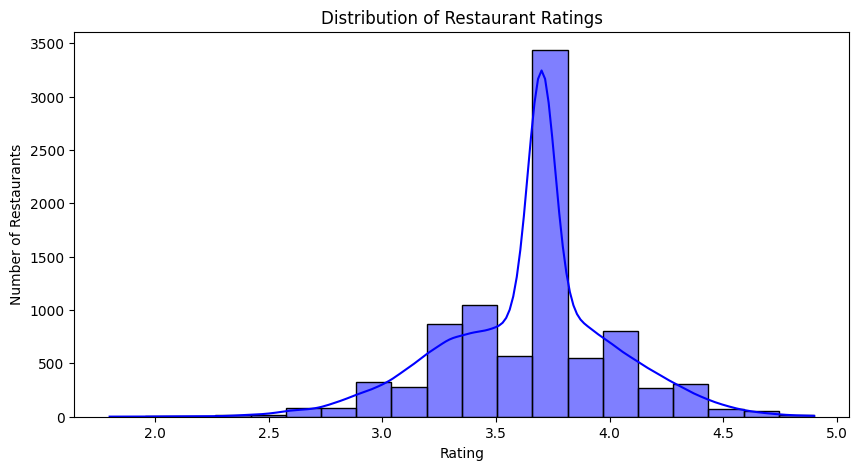

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rate'], bins=20, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings")
plt.show()

### How does online ordering affect restaurant ratings?

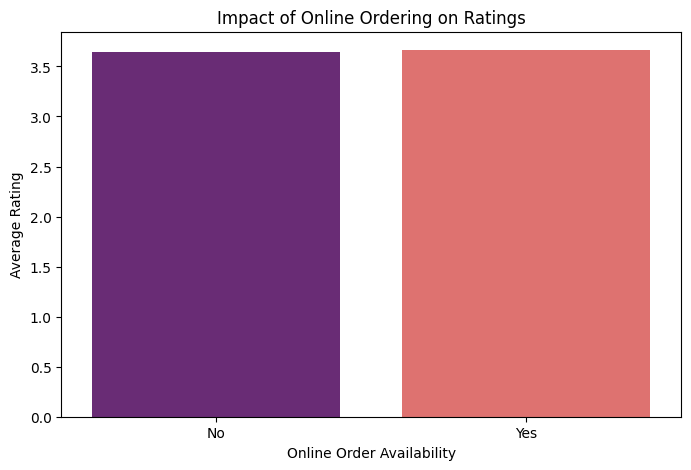

In [35]:
online_vs_rating = df.groupby("Online_Order")["Rate"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=online_vs_rating.index, y=online_vs_rating.values, hue=online_vs_rating.index, palette="magma", legend=False)
plt.xlabel("Online Order Availability")
plt.ylabel("Average Rating")
plt.title("Impact of Online Ordering on Ratings")
plt.show()

### Which restaurant types are most common?

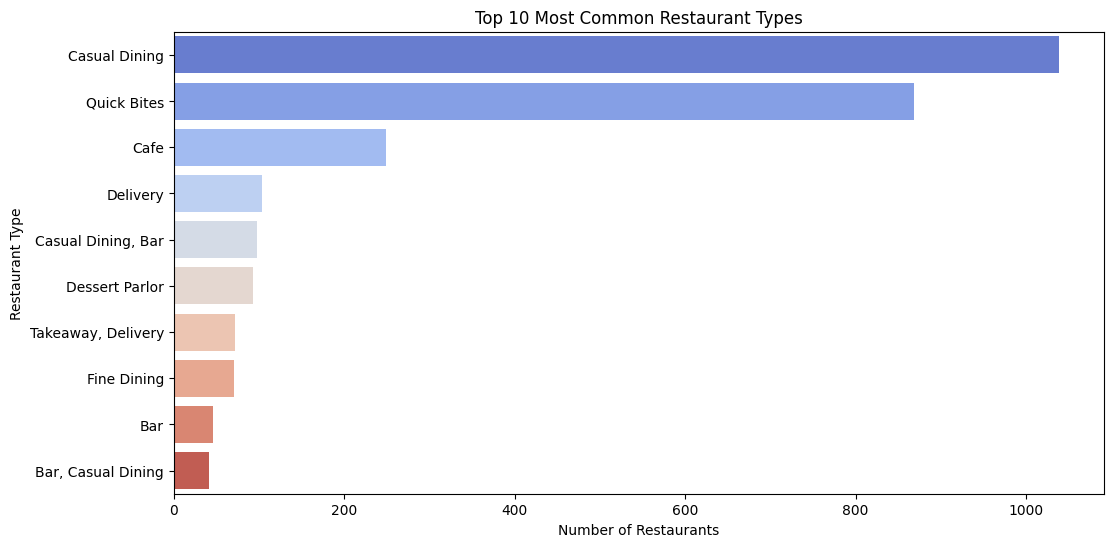

In [51]:
plt.figure(figsize=(12, 6))
rest_type_counts = df['Rest_Type'].value_counts().nlargest(10)
sns.barplot(x=rest_type_counts.values, y=rest_type_counts.index, hue=rest_type_counts.index, palette="coolwarm", legend=False)
plt.xlabel("Number of Restaurants")
plt.ylabel("Restaurant Type")
plt.title("Top 10 Most Common Restaurant Types")
plt.show()

### How does table booking affect restaurant ratings?

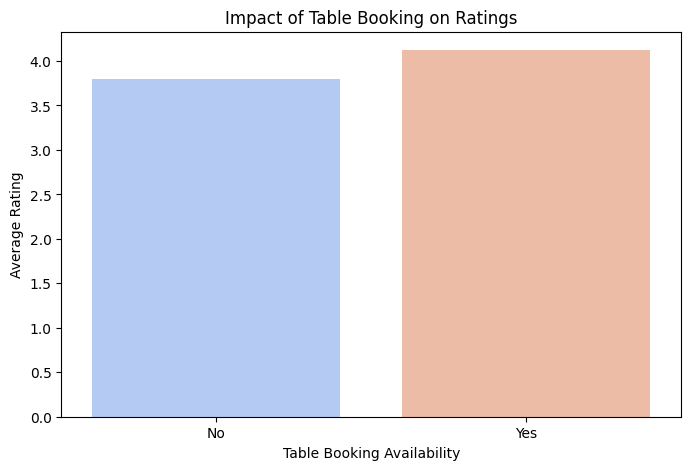

In [53]:
table_vs_rating = df.groupby("Book_Table")["Rate"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=table_vs_rating.index, y=table_vs_rating.values, hue=table_vs_rating.index, palette="coolwarm", legend=False)
plt.xlabel("Table Booking Availability")
plt.ylabel("Average Rating")
plt.title("Impact of Table Booking on Ratings")
plt.show()

### What are the most popular cuisines?

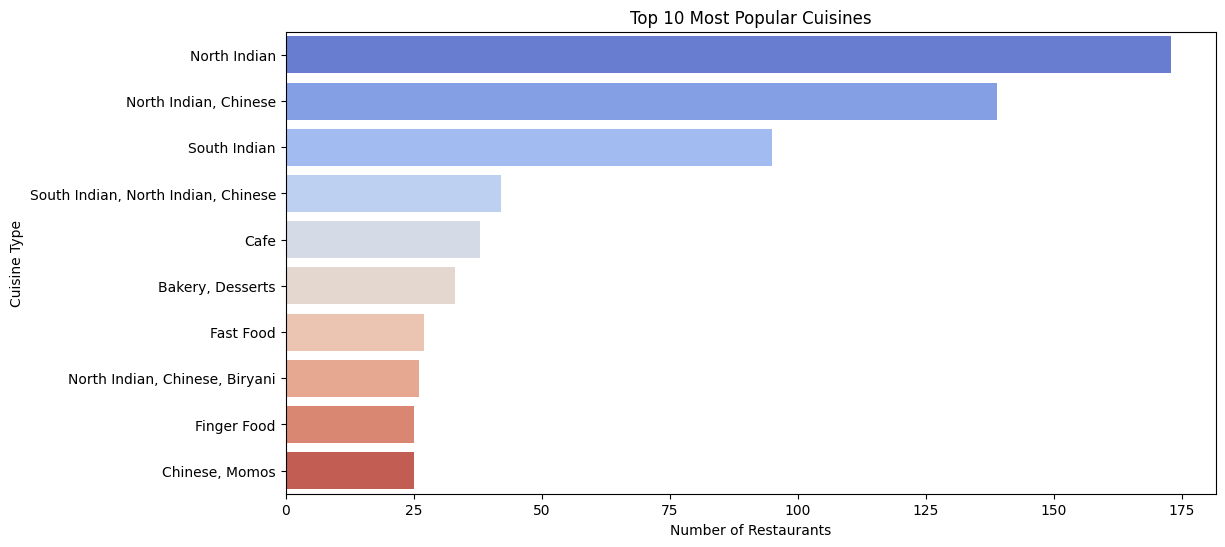

In [7]:
plt.figure(figsize=(12, 6))
popular_cuisines = df['Cuisines'].value_counts().nlargest(10).reset_index()
popular_cuisines.columns = ["Cuisine", "Count"]
sns.barplot(x="Count", y="Cuisine", data=popular_cuisines, hue="Cuisine", palette="coolwarm", legend=False)
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine Type")
plt.title("Top 10 Most Popular Cuisines")
plt.show()

### What are the most expensive restaurants based on average cost?

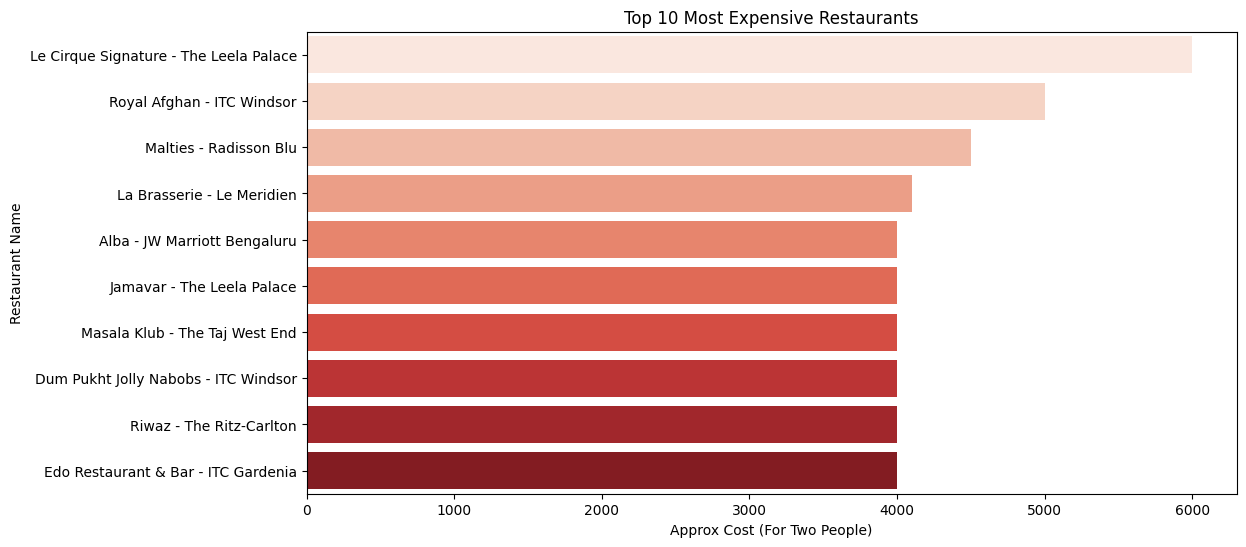

In [13]:
top_expensive = df.nlargest(10, "Approx_Cost(For Two People)")[['Name', 'Approx_Cost(For Two People)']]

plt.figure(figsize=(12, 6))
sns.barplot(x="Approx_Cost(For Two People)", y="Name", data=top_expensive, hue="Name", palette="Reds")
plt.xlabel("Approx Cost (For Two People)")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Most Expensive Restaurants")
plt.show()

### What are the most budget-friendly restaurants?

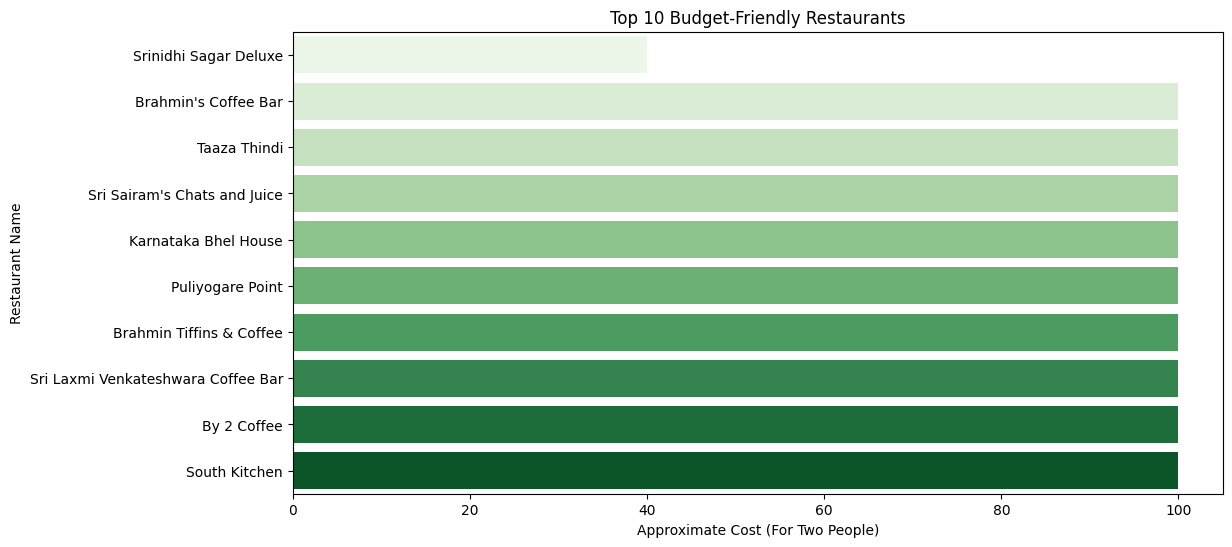

In [16]:
cheapest = df.nsmallest(10, "Approx_Cost(For Two People)")[['Name', 'Approx_Cost(For Two People)']]
plt.figure(figsize=(12, 6))
sns.barplot(x="Approx_Cost(For Two People)", y="Name", data=cheapest, hue="Name", palette="Greens", legend=False)
plt.xlabel("Approximate Cost (For Two People)")
plt.ylabel("Restaurant Name")
plt.title("Top 10 Budget-Friendly Restaurants")
plt.show()

### How do restaurant ratings vary by city?

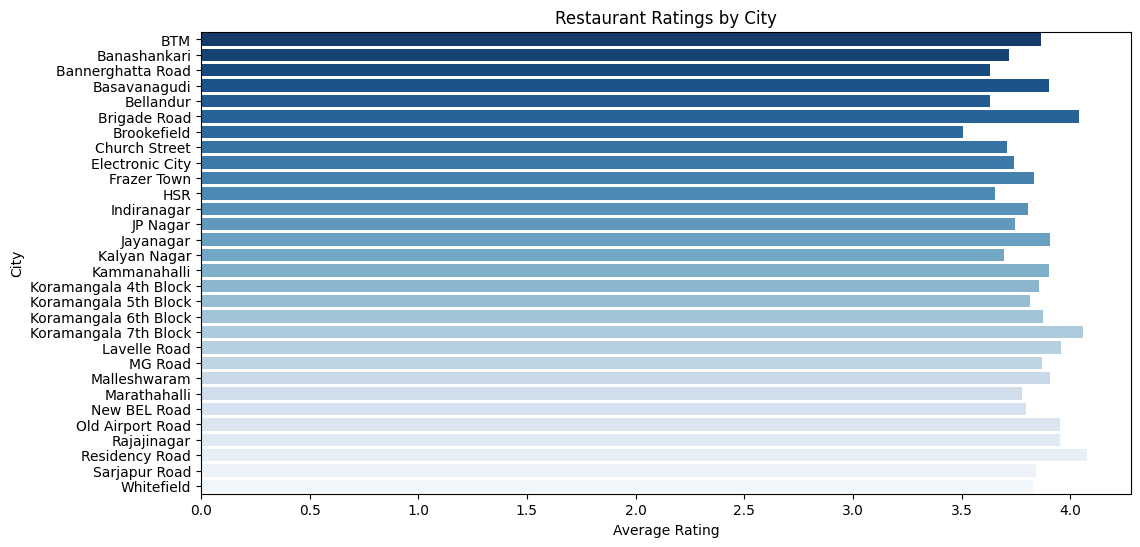

In [19]:
city_ratings = df.groupby("Listed_In(City)")["Rate"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x="Rate", y="Listed_In(City)", data=city_ratings, hue="Listed_In(City)", palette="Blues_r", legend=False)
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.title("Restaurant Ratings by City")
plt.show()

### Which locations have the most restaurants?

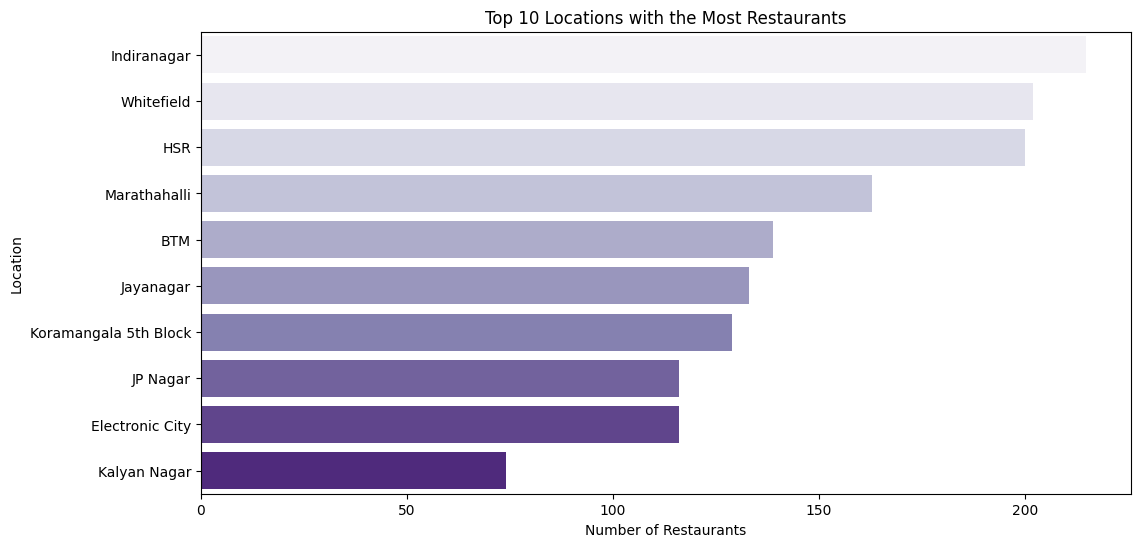

In [20]:
plt.figure(figsize=(12, 6))
top_locations = df["Location"].value_counts().nlargest(10).reset_index()
top_locations.columns = ["Location", "Count"]
sns.barplot(x="Count", y="Location", data=top_locations, hue="Location", palette="Purples", legend=False)
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.title("Top 10 Locations with the Most Restaurants")
plt.show()

### What are the busiest restaurant types?

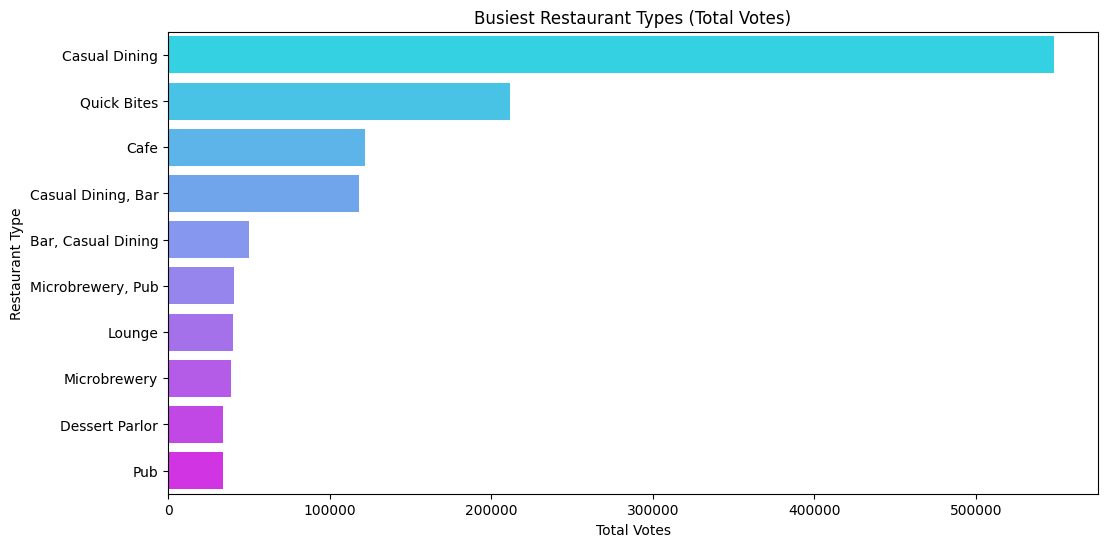

In [22]:
plt.figure(figsize=(12, 6))
busiest_types = df.groupby("Rest_Type")["Votes"].sum().nlargest(10).reset_index()
sns.barplot(x="Votes", y="Rest_Type", data=busiest_types, hue="Rest_Type", palette="cool", legend=False)
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Type")
plt.title("Busiest Restaurant Types (Total Votes)")
plt.show()

### What are the busiest cuisines based on votes?

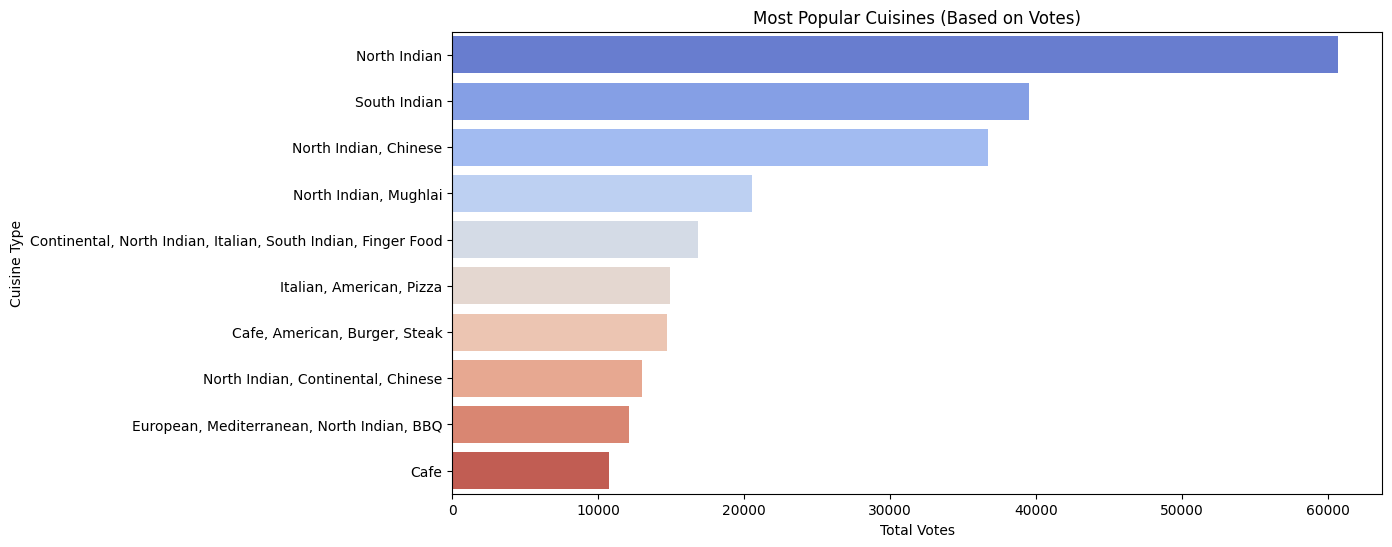

In [24]:
plt.figure(figsize=(12, 6))
busiest_cuisines = df.groupby("Cuisines")["Votes"].sum().nlargest(10).reset_index()
sns.barplot(x="Votes", y="Cuisines", data=busiest_cuisines, hue="Cuisines", palette="coolwarm", legend=False)
plt.xlabel("Total Votes")
plt.ylabel("Cuisine Type")
plt.title("Most Popular Cuisines (Based on Votes)")
plt.show()